import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from google.colab import drive

import and read dataset

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/Final Requirements Datasets/Riding in tandem in the Philippines.csv')

In [4]:
df

,year,month,police_regional_office,shooting_incidents_killed,shooting_incidents_wounded,shooting_incidents_unharmed,shooting_incidents_total,robbery_killed,robbery_wounded,robbery_unharmed,robbery_total,carnapping_killed,carnapping_wounded,carnapping_unharmed,carnapping_total,others_killed,others_wounded,others_unharmed,others_total,victims_total,status_of_suspects_at_large,status_of_suspects_arrested,status_of_suspects_killed,status_of_suspects_total,status_of_case_under_investigation,status_of_case_referred_to_pros,status_of_case_filed_in_court,status_of_case_no_case_filed,total_number_of_incidents
0,2011,January,1,12,5,1,14,0,0,1,1,0,0,0,0,1,0,0,2,20,28,1,0,29,8,9,0,0,17
1,2011,January,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,-,0,0,0,0,-
2,2011,January,3,9,5,0,12,0,0,15,15,0,0,0,0,0,0,0,0,29,54,0,0,54,21,6,0,0,27
3,2011,January,4A,7,6,2,15,0,0,17,17,0,1,0,1,0,0,0,0,33,68,0,0,68,21,9,3,0,33
4,2011,January,4B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,-,0,0,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2013,December,12,3,2,0,5,0,0,3,3,0,1,0,1,0,0,0,0,9,19,0,0,19,9,0,0,0,9
607,2013,December,13,5,1,0,5,1,0,1,2,0,0,0,0,0,0,0,0,8,21,0,0,21,5,1,1,0,7
608,2013,December,ARMM,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,1,1,17,0,0,17,4,0,0,0,4
609,2013,December,COR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


set values needed for visualization



In [5]:
# convert ' - ' to 0 
df = df.replace(' - ', 0)

# add date colum
df_numeric = df[df.columns[3:len(df.columns)]].astype('int32')
df_numeric['date'] = pd.to_datetime(df['month'] + " " + df['year'].astype(str))

# reshape dataset to get total cases in the Philippines rather than by region
df_numeric = df_numeric.pivot_table(index='date', values=list(df_numeric.columns), aggfunc=np.sum)
df_numeric

,carnapping_killed,carnapping_total,carnapping_unharmed,carnapping_wounded,others_killed,others_total,others_unharmed,others_wounded,robbery_killed,robbery_total,robbery_unharmed,robbery_wounded,shooting_incidents_killed,shooting_incidents_total,shooting_incidents_unharmed,shooting_incidents_wounded,status_of_case_filed_in_court,status_of_case_no_case_filed,status_of_case_referred_to_pros,status_of_case_under_investigation,status_of_suspects_arrested,status_of_suspects_at_large,status_of_suspects_killed,status_of_suspects_total,total_number_of_incidents,victims_total
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,9,7,1,1,4,0,1,1,85,82,2,52,70,3,23,3,2,37,126,4,323,0,327,168,174
2011-02-01,1,9,7,1,2,11,2,5,1,132,127,8,48,63,3,23,2,0,14,199,5,396,0,401,215,237
2011-03-01,0,6,5,1,0,10,6,2,1,126,117,8,65,91,8,24,1,0,23,209,8,458,0,466,233,237
2011-04-01,0,14,14,0,1,5,3,0,3,134,121,16,61,89,12,27,0,1,20,221,5,484,0,489,242,258
2011-05-01,0,7,7,0,0,2,1,1,3,118,120,3,59,86,10,26,0,1,25,187,2,432,0,434,213,230
2011-06-01,0,16,15,1,0,4,2,0,3,129,119,9,49,78,6,27,0,1,33,193,15,429,5,449,227,231
2011-07-01,0,7,6,1,0,4,2,0,5,104,98,4,62,93,4,33,0,3,27,178,6,415,0,421,208,215
2011-08-01,0,15,15,0,0,4,6,0,3,144,139,11,59,97,8,47,0,0,24,236,5,547,2,554,260,288
2011-09-01,1,6,5,0,4,14,9,1,4,57,70,10,29,40,3,17,4,1,11,101,5,173,3,181,117,153


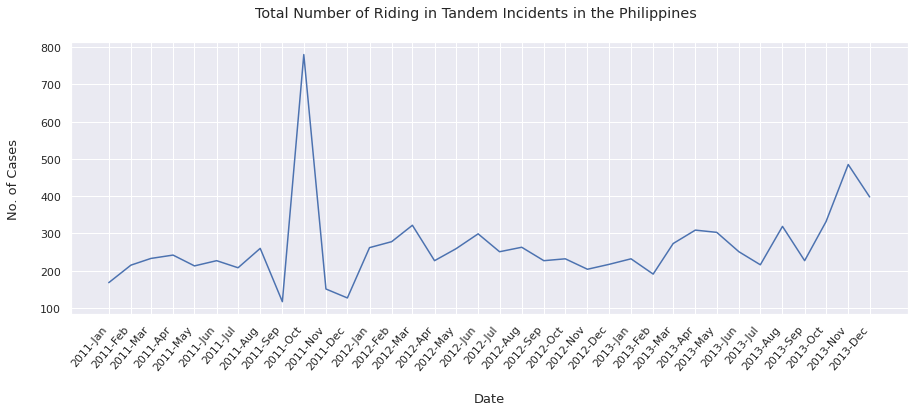

In [18]:
# create line chart
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_numeric.index, df_numeric['total_number_of_incidents'])
ax.set_xlabel('Date', fontsize=13, labelpad=20)
ax.set_ylabel('No. of Cases', fontsize=13, labelpad=20)
fig.suptitle('Total Number of Riding in Tandem Incidents in the Philippines')
plt.xticks(df_numeric.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=50, horizontalalignment='right')
fig.show()

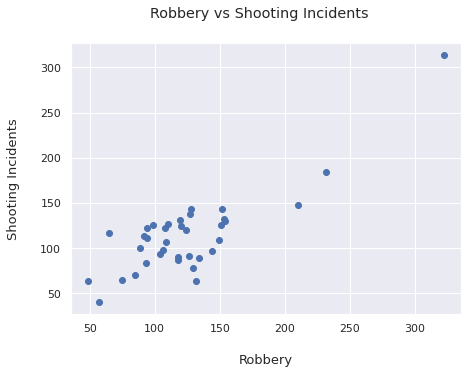

In [31]:
# create scatter plot
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x='robbery_total', y='shooting_incidents_total', data=df_numeric)
ax.set_xlabel('Robbery', fontsize=13, labelpad=20)
ax.set_ylabel('Shooting Incidents', fontsize=13, labelpad=20)
fig.suptitle('Robbery vs Shooting Incidents')
fig.show()